In [1]:
import os
import pandas as pd
import datetime
import shutil



current_dir = os.getcwd()
train_base_dir = os.path.join(current_dir, "Data", "train")
test_base_dir = os.path.join(current_dir, "Data", "test")

def decompress_files():
    train_dir = os.path.join('Data', 'train',)
    for file in os.listdir(train_dir):
        print(file)
        if file.endswith('.zip'):
            shutil.unpack_archive(os.path.join(train_dir,file), os.path.join(train_dir,f'{file[:-4]}'), 'zip')

    test_dir = os.path.join('Data', 'test',)
    for file in os.listdir(test_dir):
        print(file)
        if file.endswith('.zip'):
            shutil.unpack_archive(os.path.join(test_dir,file), os.path.join(test_dir,f'{file[:-4]}'), 'zip')


def read_raw_data():
    # Initialize a list to store file paths
    # dataframes = []
    file_paths = []

    # Walk through all directories and subdirectories in the base directory
    for root, dirs, files in os.walk(train_base_dir):
        for file in files:
            if file.endswith(".xlsx"):
                # Append the full file path to the list
                file_paths.append(os.path.join(root,file))

    # While Threads are effiecient for I/O bound tasks, in my system, this was faster for some reason so, I used it
    from concurrent.futures import ProcessPoolExecutor
    with ProcessPoolExecutor() as executor:
        dataframes = list(executor.map(pd.read_excel, file_paths))
    combined_train_df = pd.concat(dataframes, ignore_index=True)


    combined_train_df.to_csv(os.path.join(current_dir, 'Data', 'train','combined_train_data_with_other.csv'), index=False)
    combined_train_df = combined_train_df[combined_train_df['CATEGORY'] != 'OTHER']
    combined_train_df.to_csv(os.path.join(current_dir, 'Data', 'train','combined_train_data.csv'), index=False)

    test_df = pd.read_excel(os.path.join(test_base_dir,'030117_053117_Data','PPB Data','NIJ2017_MAR01_MAYR31.xlsx'))
    test_df = test_df[test_df['CATEGORY'] != 'OTHER']
    test_df.to_csv(os.path.join(current_dir, 'Data', 'test','test_data.csv'), index=False)

decompress_files()
read_raw_data()


021517_022117_Data.zip
100116_103116_Data.zip
010117_013117_Data.zip
022817_Data.zip
090116_093016_Data.zip
080116_083116_Data.zip
020117_021417_Data.zip
110116_113016_Data.zip
030112_123112_Data.zip
010116_073116_Data.zip
010113_123113_Data.zip
120116_123116_Data.zip
022717_Data.zip
022217_022617_Data.zip
010115_123115_Data.zip
010114_123114_Data.zip
test_data.csv
030117_053117_Data.zip


In [3]:
df = pd.read_csv(os.path.join(current_dir, 'Data', 'train','combined_train_data.csv'))
df

,CATEGORY,CALL GROUPS,final_case_type,CASE DESC,occ_date,x_coordinate,y_coordinate,census_tract
0,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2017-02-28,7637348,708028,3901.0
1,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2017-02-28,7641290,681424,5500.0
2,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2017-02-28,7641420,681505,5500.0
3,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2017-02-28,7642508,687040,5000.0
4,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2017-02-28,7653186,684765,2000.0
...,...,...,...,...,...,...,...,...
172246,BURGLARY,PROPERTY CRIME,BURGP,BURGLARY - PRIORITY *H ...,2017-01-28,7666223,663590,8600.0
172247,BURGLARY,PROPERTY CRIME,BURGP,BURGLARY - PRIORITY *H ...,2017-01-29,7685261,684379,9302.0
172248,BURGLARY,PROPERTY CRIME,BURGP,BURGLARY - PRIORITY *H ...,2017-01-31,7641333,698773,3501.0
172249,BURGLARY,PROPERTY CRIME,BURGP,BURGLARY - PRIORITY *H ...,2017-01-31,7651232,697622,3301.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172251 entries, 0 to 172250
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CATEGORY         172251 non-null  object 
 1   CALL GROUPS      172251 non-null  object 
 2   final_case_type  172251 non-null  object 
 3   CASE DESC        172251 non-null  object 
 4   occ_date         172251 non-null  object 
 5   x_coordinate     172251 non-null  int64  
 6   y_coordinate     172251 non-null  int64  
 7   census_tract     169210 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 10.5+ MB


In [5]:
df['occ_date'] = pd.to_datetime(df['occ_date'])
# df.describe()


Missing Values:
 CATEGORY              0
CALL GROUPS           0
final_case_type       0
CASE DESC             0
occ_date              0
x_coordinate          0
y_coordinate          0
census_tract       3041
dtype: int64


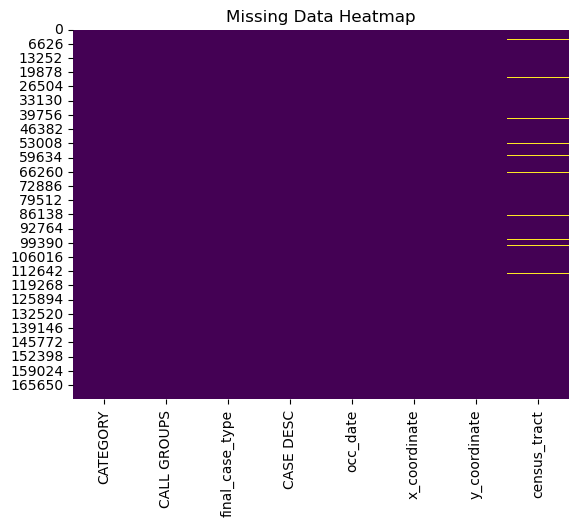

In [6]:
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Visualize Missing Data
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

There are 3041 missing values in the census_tract column. But, all the other column don't have any missing values. Since I didn't use this column for analysis or joining other external data set due to lack of time, I dropped that entire column instead of the row consisting of missing values for that column.


Value Counts for CATEGORY:
 CATEGORY
STREET CRIMES          158088
MOTOR VEHICLE THEFT      9060
BURGLARY                 5103
Name: count, dtype: int64


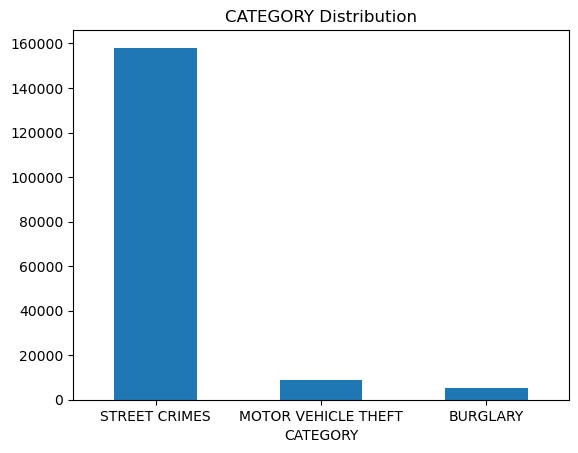


Value Counts for CALL GROUPS:
 CALL GROUPS
DISORDER          119659
PERSON CRIME       38429
PROPERTY CRIME     12960
 SUSPICIOUS         1203
Name: count, dtype: int64


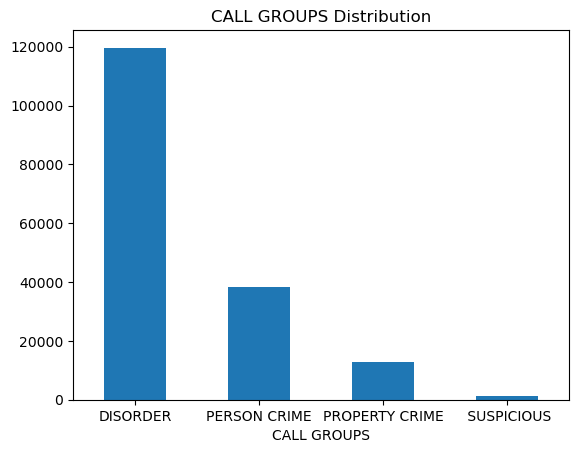


Value Counts for final_case_type:
 final_case_type
DISTP     101819
ASSLTP     15966
VICE       14705
SHOTS       8402
VEHREC      7439
THRETP      6913
BURGP       3900
DISTW       3130
THRETW      2644
ROBP        2014
VEHSTP      1617
PROWLP      1203
ROBW        1156
ASSLTW       723
STABW        357
SHOOTW       254
GANG           5
RSTLN          4
Name: count, dtype: int64


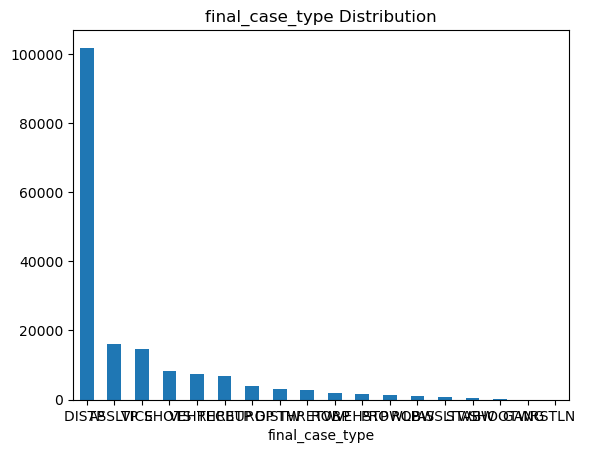

In [7]:
# Categorical Variable Analysis
categorical_columns = ['CATEGORY', 'CALL GROUPS', 'final_case_type']
for col in categorical_columns:
    print(f"\nValue Counts for {col}:\n", df[col].value_counts())
    df[col].value_counts().plot(kind='bar', title=f'{col} Distribution')
    plt.xticks(rotation=0)
    plt.show()


Looking at these graph, it can be said that the most of the CFS falls under the Street Crime Category and within that under the Disorder group.

## Temporal Analysis

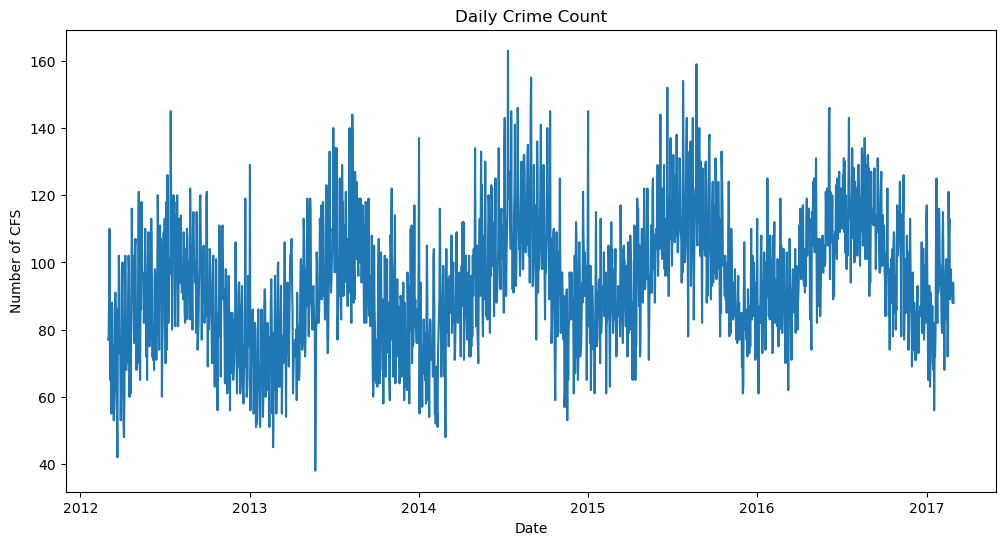

In [ ]:
# Aggregate Crimes by Day
daily_crimes = df.groupby(df['occ_date'].dt.date).size()
daily_crimes.plot(title="Daily Crime Count", figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Number of CFS")
plt.show()


From the above figure it can be seen that, there is a clear repetative pattern which follows seasonal trend. So, month can also be a good predictor.

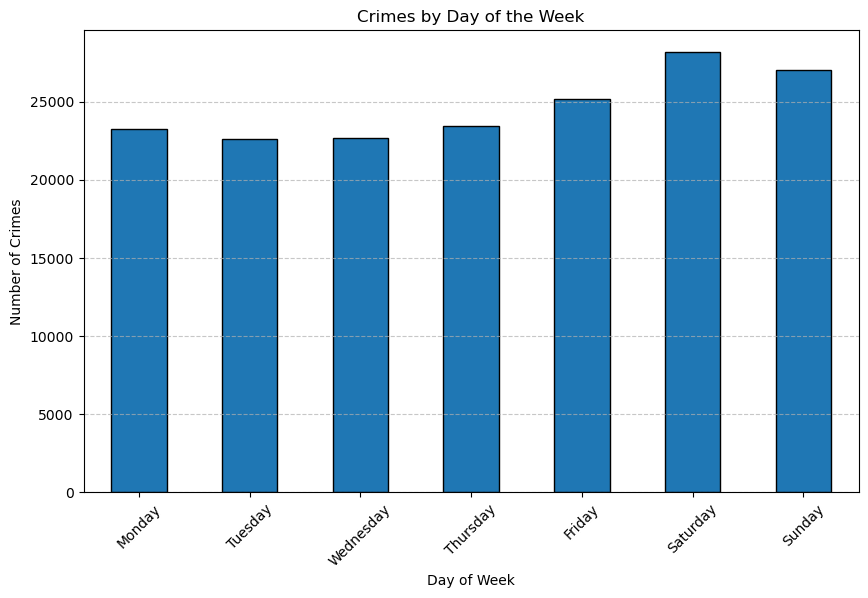

In [ ]:


# Create the `day_of_week` column
df['day_of_week'] = df['occ_date'].dt.day_name()

# Aggregating data by day of the week
day_of_week_counts = df['day_of_week'].value_counts()

# Reorder days to follow the weekly order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_counts = day_of_week_counts.reindex(day_order)

day_of_week_counts.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title("Crimes by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the above figure indicates that crimes on weekends is comparatively higher than on weekdays. It can be further illustrated with the following figure depicting average crimes on weekdays vs Weekends.

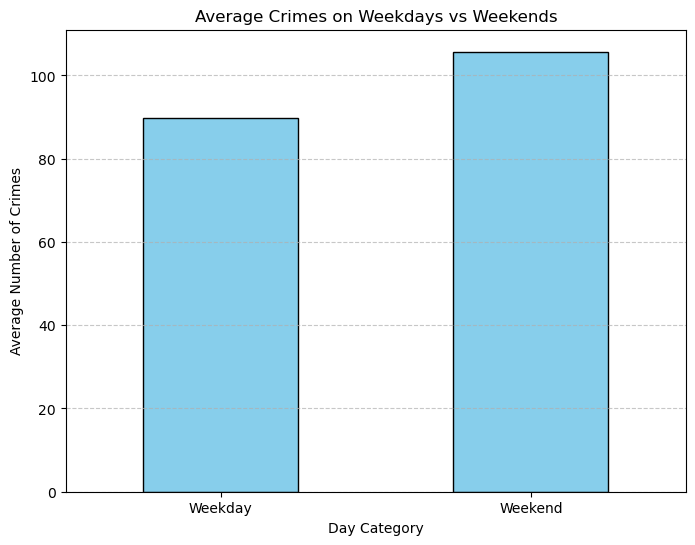

In [52]:
import pandas as pd
import matplotlib.pyplot as plt



#  get the number of crimes per day
daily_crimes = df.groupby('occ_date').size()

# add is_weekend column
daily_crimes_df = daily_crimes.reset_index(name='crime_count')
daily_crimes_df['day_of_week'] = daily_crimes_df['occ_date'].dt.day_name()
daily_crimes_df['is_weekend'] = daily_crimes_df['day_of_week'].isin(['Saturday', 'Sunday'])

# average crimes for weekdays and weekends
average_crimes = daily_crimes_df.groupby('is_weekend')['crime_count'].mean().reset_index()

# mapping is_weekend` to 'Weekday' and 'Weekend' for better readability
average_crimes['category'] = average_crimes['is_weekend'].map({True: 'Weekend', False: 'Weekday'})

# Plot 
average_crimes.set_index('category')['crime_count'].plot(kind='bar', color='skyblue', figsize=(8, 6), edgecolor='black')
plt.title("Average Crimes on Weekdays vs Weekends")
plt.ylabel("Average Number of Crimes")
plt.xlabel("Day Category")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This led me to wonder whether more crimes occur on holidays. So inspecting average crimes on national holidays vs other days

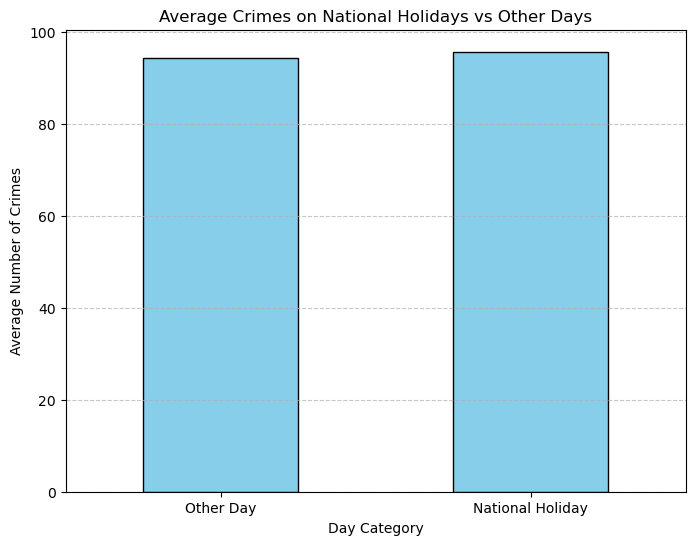

,is_national_holiday,crime_count,category
0,False,94.292889,Other Day
1,True,95.629630,National Holiday


In [62]:
import holidays

# Initialize U.S. holidays
us_holidays = holidays.US(years=[x for x in range(2012,2018)])


daily_crimes = df.groupby('occ_date').size()

# Add the national_holiday column
df['national_holiday'] = df['occ_date'].apply(lambda x: x in us_holidays)

# Create a DataFrame with crime counts and holiday status
daily_crimes_df = daily_crimes.reset_index(name='crime_count')
daily_crimes_df['is_national_holiday'] = daily_crimes_df['occ_date'].apply(lambda x: x in us_holidays)  # Use the list of holidays from previous code

average_crimes_nh = daily_crimes_df.groupby('is_national_holiday')['crime_count'].mean().reset_index()

# mapping is_national_holiday to readable labels
average_crimes_nh['category'] = average_crimes_nh['is_national_holiday'].map({True: 'National Holiday', False: 'Other Day'})


average_crimes_nh.set_index('category')['crime_count'].plot(kind='bar', color='skyblue', figsize=(8, 6), edgecolor='black')
plt.title("Average Crimes on National Holidays vs Other Days")
plt.ylabel("Average Number of Crimes")
plt.xlabel("Day Category")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

average_crimes_nh


Average crime on national holidays is slightly higher than on other days but the difference is small.

## Spatial Analysis

Coordinate Reference System: EPSG:2913


/home/test/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_57633/245132296.py:16: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:2913

  crime_with_districts = gpd.sjoin(crime_data, police_districts, how="left", op="within")


     occ_date DISTRICT
0  2017-02-28      530
1  2017-02-28      850
2  2017-02-28      850
3  2017-02-28      821
4  2017-02-28      720


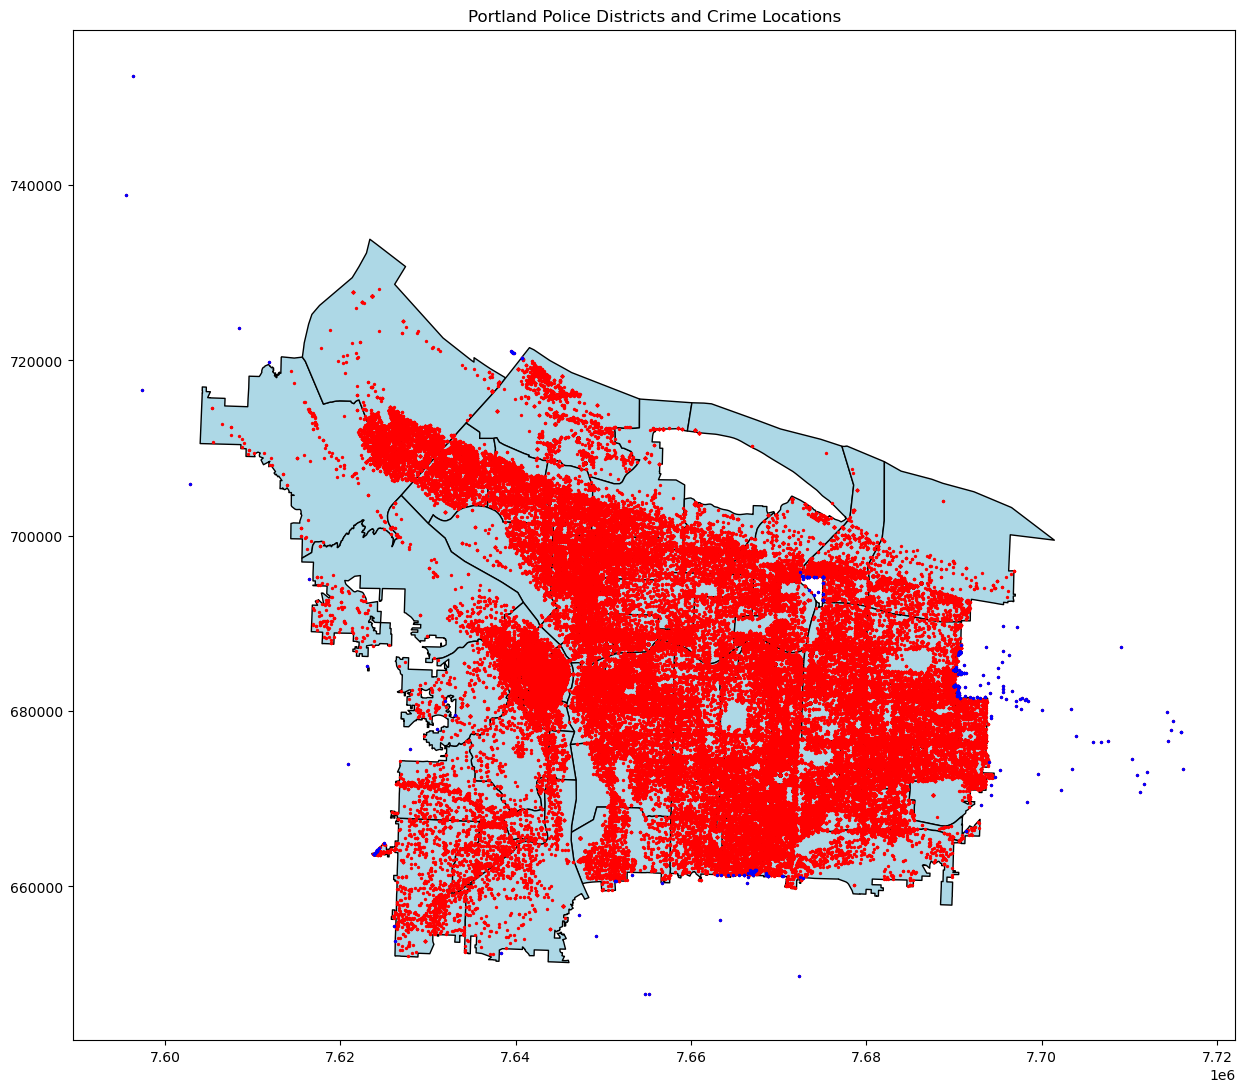

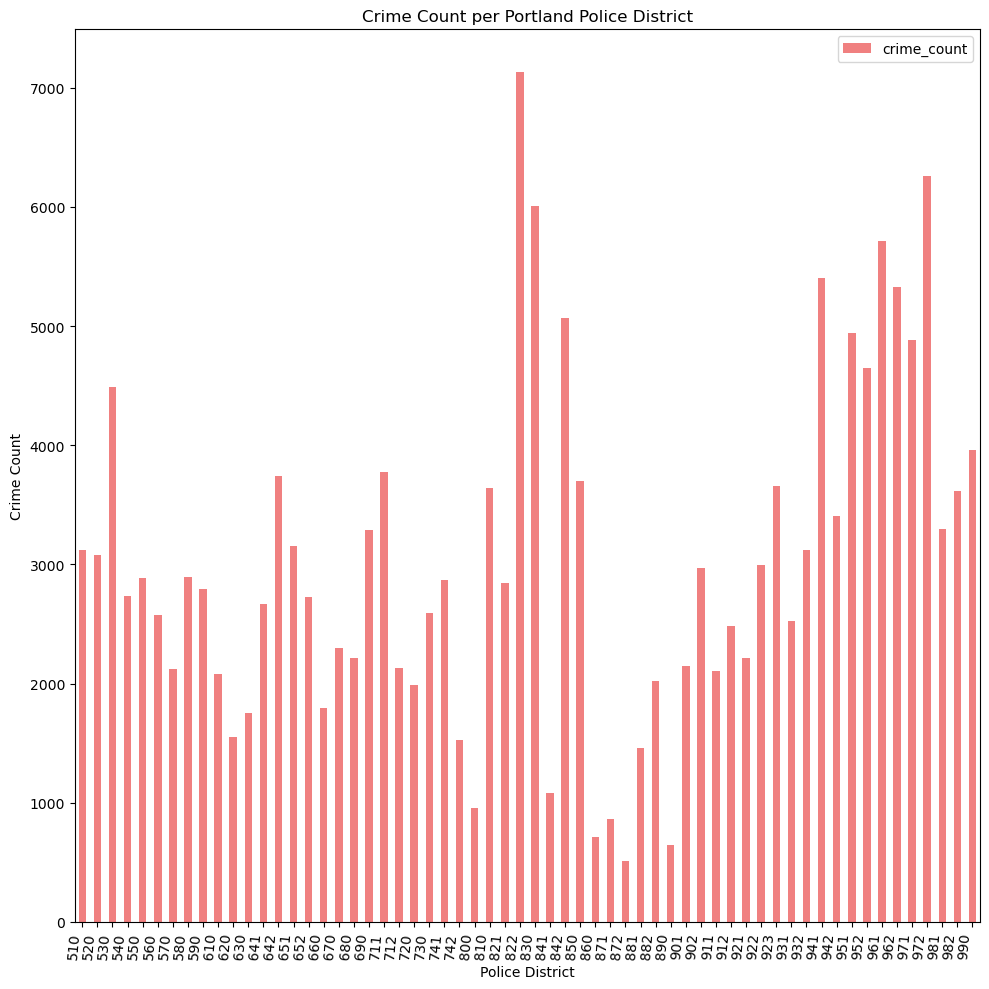

In [ ]:
import os
import geopandas as gpd

# Load the shapefile for Portland Police Districts
shapefile_path = os.path.join(current_dir, 'Data','portland-police-districts', 'Portland_Police_Districts.shp')
police_districts = gpd.read_file(shapefile_path)

print(f"Coordinate Reference System: {police_districts.crs}")

crime_data = pd.read_csv(os.path.join(current_dir,'Data','train','combined_data.csv'))

# Create a GeoDataFrame from the crime data
crime_data = gpd.GeoDataFrame(crime_data, geometry=gpd.points_from_xy(crime_data.x_coordinate, crime_data.y_coordinate))

# Spatial join between the crime data and the police districts (with 'within' operation)
crime_with_districts = gpd.sjoin(crime_data, police_districts, how="left", op="within")
# # Check the join 
print(crime_with_districts[['occ_date', 'DISTRICT']].head())

# Aggregate crime counts by police district
# Group by the 'DISTRICT' column and count the number of crimes in each district
crime_counts_by_district = crime_with_districts.groupby('DISTRICT').size().reset_index(name='crime_count')

# Plotting the districts and crime locations
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plot the police districts
min_x, min_y, max_x, max_y = police_districts.total_bounds  # Bounding box of the districts

police_districts.plot(ax=ax, color='lightblue', edgecolor='black')
# plt.scatter(x=[min_x,max_x], y = [min_y,max_y])

# Plot crime points over the districts (crime data)
csf_with_missing_district = crime_with_districts[crime_with_districts['DISTRICT'].isna()]

crime_with_districts.plot(ax=ax, color='red', markersize=2)

# differentiating between crim within districts and outside
csf_with_missing_district.plot(ax=ax, color='blue', markersize=2)


# Display the plot
plt.title("Portland Police Districts and Crime Locations")
plt.show()

# Plotting the aggregated crime counts per district
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the aggregated crime counts by district
crime_counts_by_district.plot(kind='bar', x='DISTRICT', y='crime_count', ax=ax, color='lightcoral')

# Title and formatting for the bar plot
plt.title("Crime Count per Portland Police District")
plt.xlabel("Police District")
plt.ylabel("Crime Count")
plt.xticks(rotation=85, ha='right')
plt.tight_layout()
plt.show()

From the plots of location of CFS over the map of portland, it can be seen that there are some concentrated regions of CFS and also there are regions with no CSF. This spatial feature can be exploited to build a model that consider some regions as hotspot based on the no. of CFS on the region.

The district with clearly the highest crime count is "district 822" 